In [1]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Mounted at /content/drive


In [106]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
base_path = Path('/content/drive/MyDrive/Colab Notebooks/DANE LEKCJA 1') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

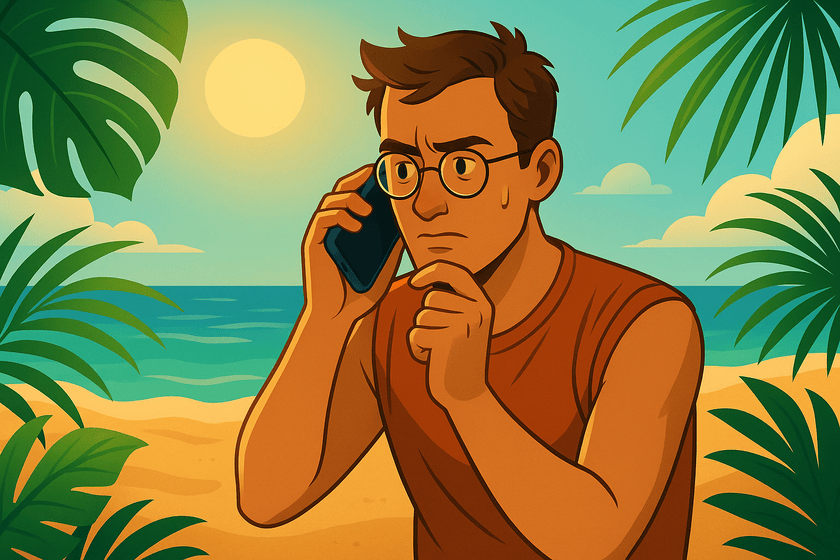

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [167]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# **Sprawdzanie informacji**

1.1 Sprawdzam 10 pierwszych wierszy zbioru

In [168]:
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,NaN,NaN,S


1.2 Sprawdzam szczegółowe informacje na temat zbioru, m.in. typ danych, suma wierszy, itd.

In [169]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


1.3 Sprawdzam sumy pozycji NaN każdego zbioru

In [170]:
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,98
Cabin,687


# **Czyszczenie zbioru**

2.1 Zdecydowałam, że wyrzucę ze zbioru nieistnotne dla modelu kolumny, oraz jedną, która ma większość pozycji NaN

In [171]:
titanic_clean = titanic_df.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
titanic_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

2.2 Uzupełniam puste pozycje, kolumny "Age", średnią wieku wszystkich pasażerów. Od razu zamieniam typ danych, w tej kolumnie, z float64 na int64.

In [172]:
medianaAge = titanic_clean['Age'].mean().round()
titanic_clean['Age'] = titanic_clean['Age'].fillna(medianaAge)
titanic_clean['Age'] = titanic_clean['Age'].round().astype('int64')
print('NaN: ', titanic_clean['Age'].isna().sum())
titanic_clean.dtypes

NaN:  0


,0
Survived,int64
Pclass,int64
Sex,object
Age,int64
SibSp,int64
Parch,int64


# **Dokańczanie przygotowania wzoru**

3.1 Sprawdzam skrajne wartości każdej kolumny

In [173]:
print(titanic_clean.describe())
print('\nWartości najmniejsze: \n', titanic_clean.min(), '\n\nWartości największe: \n', titanic_clean.max())

         Survived      Pclass         Age       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.754209    0.523008    0.381594
std      0.486592    0.836071   13.000828    1.102743    0.806057
min      0.000000    1.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000
50%      0.000000    3.000000   30.000000    0.000000    0.000000
75%      1.000000    3.000000   35.000000    1.000000    0.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000

Wartości najmniejsze: 
 Survived         0
Pclass           1
Sex         female
Age              0
SibSp            0
Parch            0
dtype: object 

Wartości największe: 
 Survived       1
Pclass         3
Sex         male
Age           80
SibSp          8
Parch          6
dtype: object


3.2 Mapuję/Zakodowuję cechę kategorialną zbioru

In [174]:
mapping = {'male': 0,
           'female': 1
          }

titanic_clean['Sex'] = titanic_clean['Sex'].map(mapping)
titanic_clean

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,0,22,1,0
2,1,1,1,38,1,0
3,1,3,1,26,0,0
4,1,1,1,35,1,0
5,0,3,0,35,0,0
...,...,...,...,...,...,...
887,0,2,0,27,0,0
888,1,1,1,19,0,0
889,0,3,1,30,1,2


3.3 Sprawdzam na konkretnym pasażerze, czy dane są prawidołowo wyświetlane (konkretnie to z ciekawości czy przeżył, ponieważ z danych wyszło, że jego wiek to 0)

In [175]:
titanic_clean.loc[804]

,804
Survived,1
Pclass,3
Sex,0
Age,0
SibSp,0
Parch,1


3.4 Dodaję 2 nowe kolumny. Pierwsza, na podstawie wieku, określa czy ktoś jest dorosły. Druga, na podstawie sumy rodzeństwa, dzieci, małżonków oraz rodziców na pokładzie, określa czy ktoś posiada na statku swoją rodzinę.

In [176]:
titanic_clean['IsAdult'] = (titanic_clean['Age'] >= 18).astype(int)
titanic_clean['FamilyAboard'] = (titanic_clean['SibSp'] + titanic_clean['Parch'] >= 1).astype('int')
titanic_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,IsAdult,FamilyAboard
PassengerId,,,,,,,,
1,0,3,0,22,1,0,1,1
2,1,1,1,38,1,0,1,1
3,1,3,1,26,0,0,1,0
4,1,1,1,35,1,0,1,1
5,0,3,0,35,0,0,1,0
6,0,3,0,30,0,0,1,0
7,0,1,0,54,0,0,1,0
8,0,3,0,2,3,1,0,1
9,1,3,1,27,0,2,1,1


# **Wizualizacja danych**

In [177]:
titanic_clean_pl = titanic_clean.rename(columns={
    'Survived': 'Przeżycie',
    'Pclass': 'Klasa',
    'Sex': 'Płeć',
    'Age': 'Wiek'
})

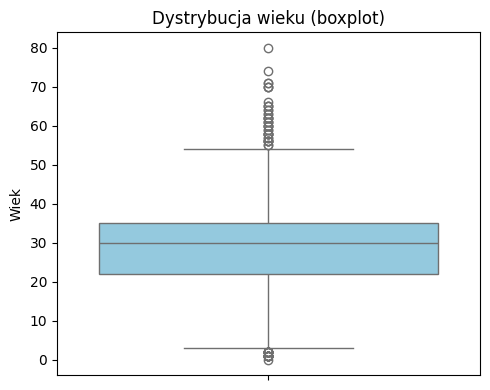

In [178]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=titanic_clean_pl['Wiek'], color='skyblue')
plt.title("Dystrybucja wieku (boxplot)")
plt.tight_layout()
plt.show()

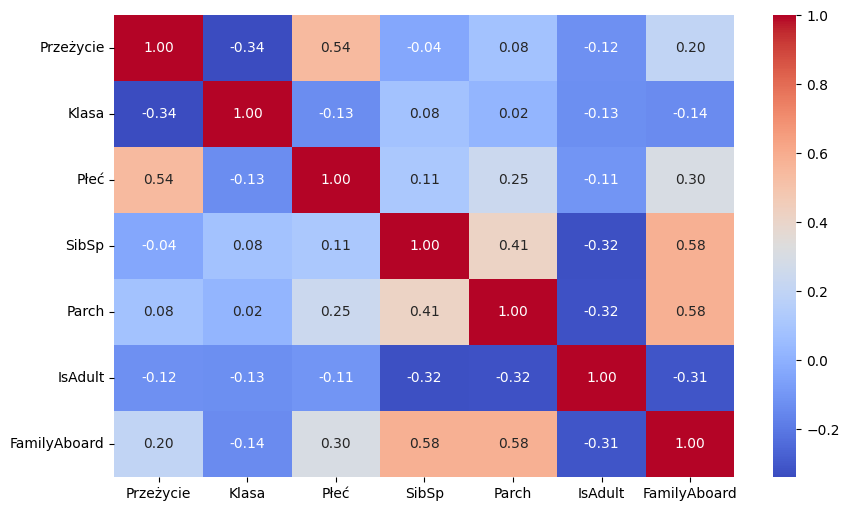

In [179]:
titanic_clean_heatmap = titanic_clean_pl.drop(columns=['Wiek']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(titanic_clean_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Text(0, 0.5, 'Wielkość rodziny')

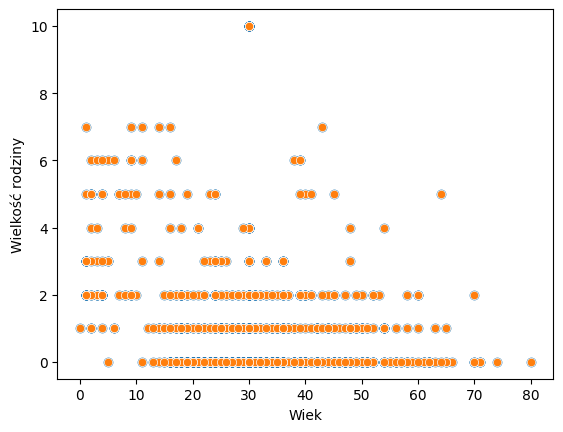

In [180]:
plt.scatter(titanic_clean_pl['Wiek'], (titanic_clean_pl['SibSp'] + titanic_clean_pl['Parch']))
sns.scatterplot(x='Wiek', y=(titanic_clean_pl['SibSp'] + titanic_clean_pl['Parch']), data=titanic_clean_pl)
plt.xlabel("Wiek")
plt.ylabel("Wielkość rodziny")

<Axes: xlabel='Płeć', ylabel='Wiek'>

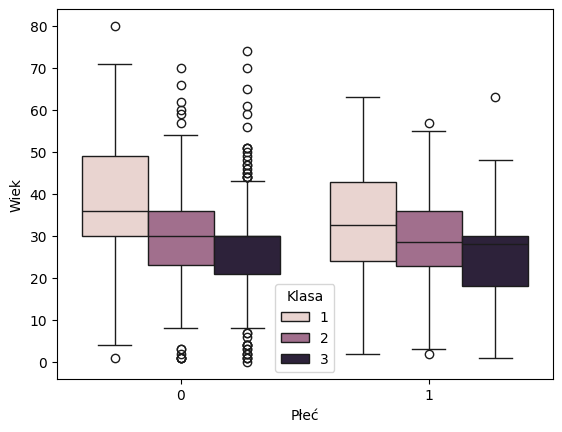

In [181]:
sns.boxplot(data=titanic_clean_pl, x="Płeć", y="Wiek", hue="Klasa")

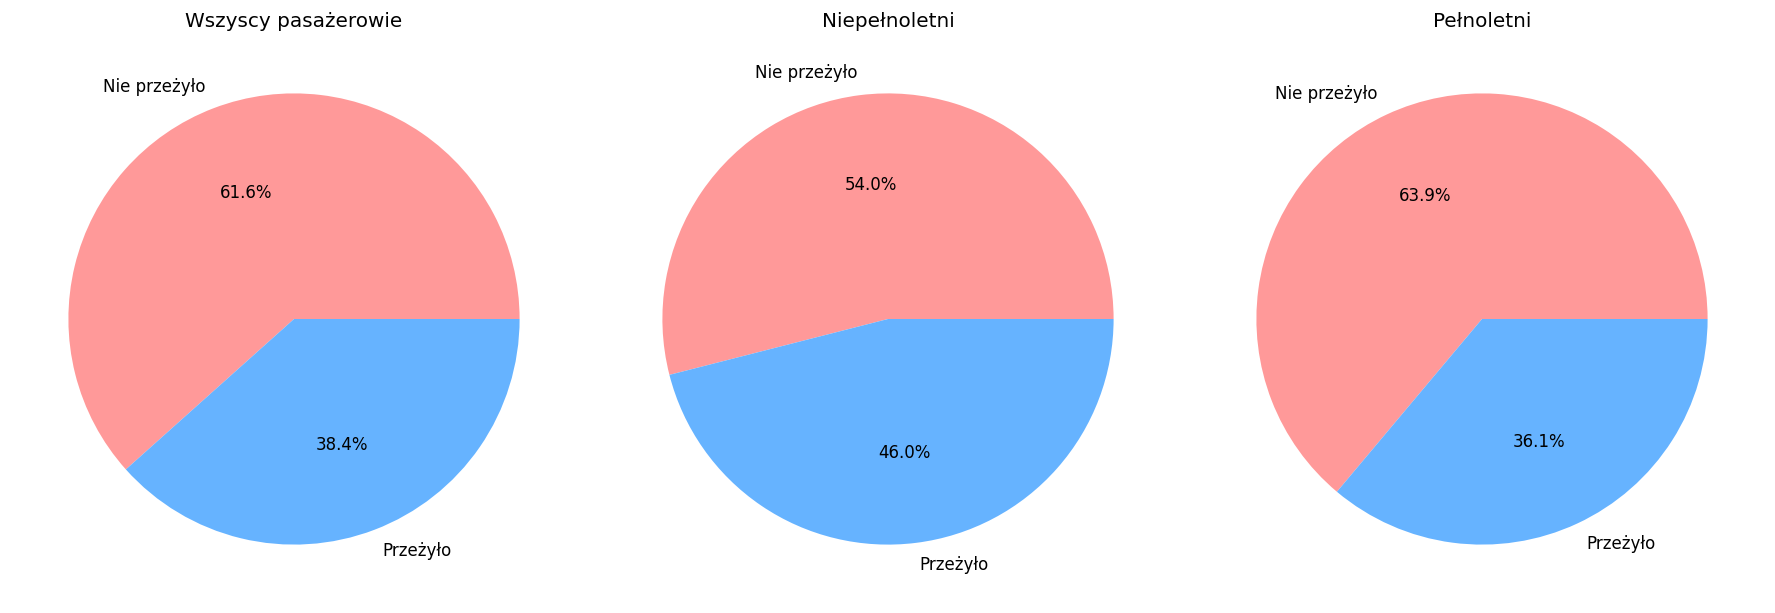

In [182]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=120)

titanic_clean['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Nie przeżyło', 'Przeżyło'],
    colors=['#ff9999', '#66b3ff'],
    ax=axes[0]
)
axes[0].set_title("Wszyscy pasażerowie")
axes[0].set_ylabel('')


titanic_clean.loc[titanic_clean['IsAdult'] == 0, 'Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Nie przeżyło', 'Przeżyło'],
    colors=['#ff9999', '#66b3ff'],
    ax=axes[1]
)
axes[1].set_title("Niepełnoletni")
axes[1].set_ylabel('')


titanic_clean.loc[titanic_clean['IsAdult'] == 1, 'Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Nie przeżyło', 'Przeżyło'],
    colors=['#ff9999', '#66b3ff'],
    ax=axes[2]
)
axes[2].set_title("Pełnoletni")
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

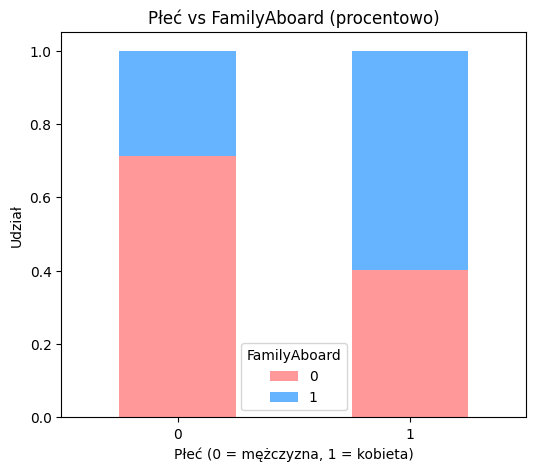

In [183]:
cross_tab = pd.crosstab(titanic_clean_pl['Płeć'], titanic_clean_pl['FamilyAboard'])

cross_tab_perc = cross_tab.div(cross_tab.sum(axis=1), axis=0)
cross_tab_perc.plot(kind='bar', stacked=True, figsize=(6, 5), color=['#ff9999', '#66b3ff'])
plt.title("Płeć vs FamilyAboard (procentowo)")
plt.xlabel("Płeć (0 = mężczyzna, 1 = kobieta)")
plt.ylabel("Udział")
plt.legend(title="FamilyAboard")
plt.xticks(rotation=0)
plt.show()